In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
from cell import Cell
import numpy
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

## first simulation growth without any abx as an integrity check

In [44]:
param = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 1, 
         "beta": 1, 
         "gama": 1, 
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim = Cell(**param)

In [45]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
time_series = my_sim.cell_growth(initial_conditions, length=100, methods="RK45")

100%|██████████| 1000/1000 [00:00<00:00, 244423.31‰/s]


In [36]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.413e-03 ...  9.842e+01  1.000e+02]
        y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
            [ 1.000e+00  1.001e+00 ...  1.999e+00  1.999e+00]
            ...
            [ 0.000e+00  1.413e-03 ...  9.987e-01  9.989e-01]
            [ 1.000e+00  1.000e+00 ...  2.631e+42  1.280e+43]]
      sol: None
 t_events: None
 y_events: None
     nfev: 410
     njev: 0
      nlu: 0


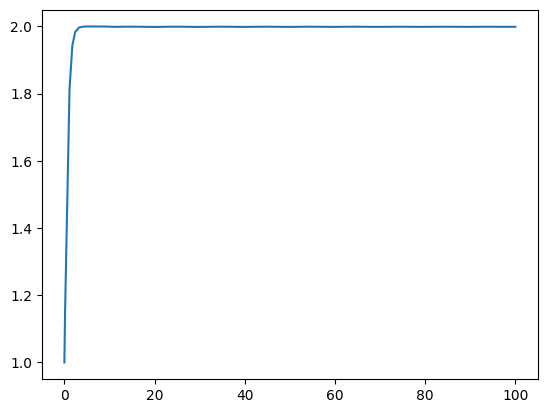

In [42]:
plt.plot(time_series.t, time_series.y[1])
plt.show()

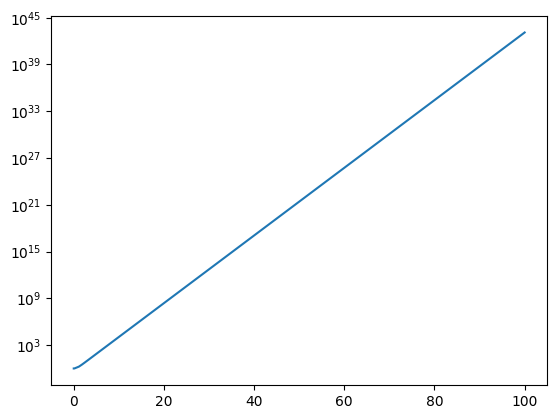

In [43]:
fig, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax.set_yscale('log')
plt.show()

## abx treatment - constant env

In [49]:
param = {"ribo_min": 0, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 0, 
         "alpha": 1, 
         "beta": 1, 
         "gama": 1, 
         "abx_env": 1, 
         "t_start": 10, 
         "t_end": -1}
my_sim = Cell(**param)

In [50]:
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
time_series = my_sim.cell_growth(initial_conditions, length=200, methods="RK45")

100%|██████████| 1000/1000 [00:00<00:00, 125596.77‰/s]


In [51]:
print(time_series)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.413e-03 ...  1.994e+02  2.000e+02]
        y: [[ 0.000e+00  0.000e+00 ...  3.823e-01  3.821e-01]
            [ 1.000e+00  1.001e+00 ...  1.000e+00  1.000e+00]
            ...
            [ 0.000e+00  1.413e-03 ...  6.177e-01  6.180e-01]
            [ 1.000e+00  1.000e+00 ...  2.709e+55  3.859e+55]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1052
     njev: 0
      nlu: 0


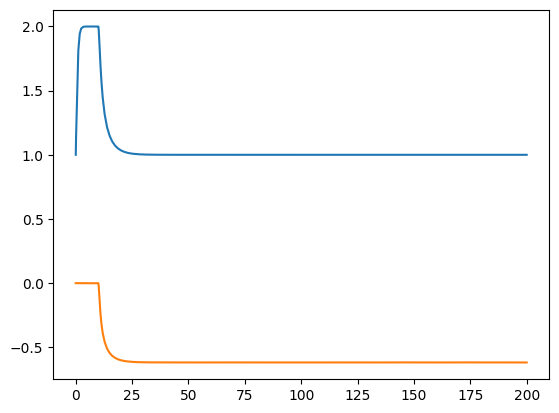

In [55]:
plt.plot(time_series.t, time_series.y[1])
plt.plot(time_series.t, time_series.y[2])
plt.show()

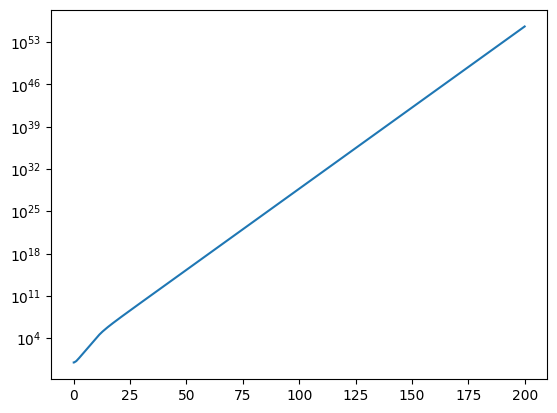

In [56]:
fig, ax = plt.subplots()
ax.plot(time_series.t, time_series.y[4])
ax.set_yscale('log')
plt.show()